# Electricity Demand Forecasting For Leading Electricity Distributor

## Business Context:
One of leading electricity Distribution Company would like to understand demand for electricity for
the next 1-2 years to manage the production of electricity and managing the vendors for the same. It
is one of the important exercises to getting accurate estimation of demand so that they can procure
or produce the electricity as per the demand.

# Business Objective:
#### a. Need to forecast the demand of electricity for next 1-2 years.
#### b. Calculate error metrics (RMSE, RMSPE, MAPE)
#### c. Compare various models including Decomposition, ETS models, ARIMA/SARIMA Models with various parameters etc…

# Import libraries and load the datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 5)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 125
# Loading date wrangling package
from datetime import datetime

In [2]:
df=pd.read_csv("Electricity Consumption.csv")

In [3]:
df.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [4]:
##Converting normal data into Time Series data using pd.date_range

Now, Define column names, drop nulls, convert Date to DateTime format and make Date as an index column because it is not possible to plot the graph without index.

In [5]:
df.columns=['Date', 'Consumption']
df=df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) #set date as index
df.head()

,Consumption
Date,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107


In [6]:
df

,Consumption
Date,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  561 non-null    float64
dtypes: float64(1)
memory usage: 8.8 KB


## Checking Missing Values

In [8]:
df.isna().sum()

Consumption    0
dtype: int64

## Checking Duplicate Values

In [9]:
df.duplicated().sum()

0

## let us start

## 1. Visualizing the time series.

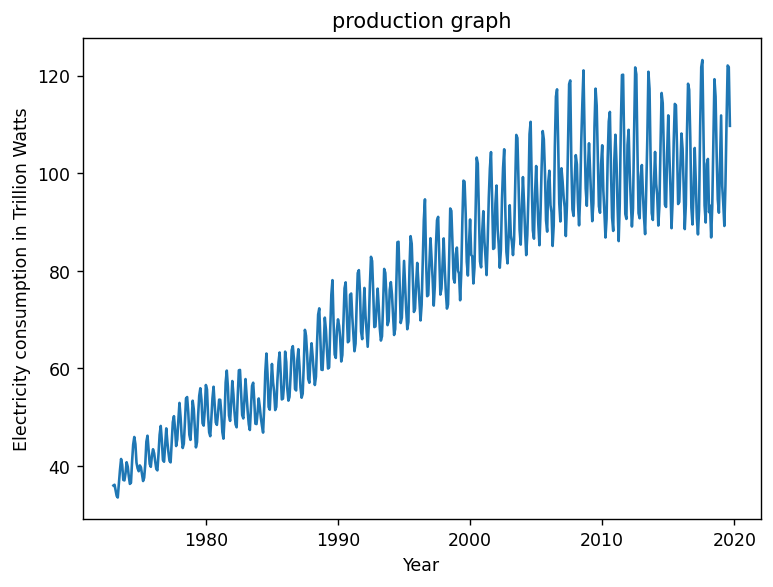

In [10]:
plt.xlabel("Year")
plt.ylabel("Electricity consumption in Trillion Watts")
plt.title("production graph")
plt.plot(df)

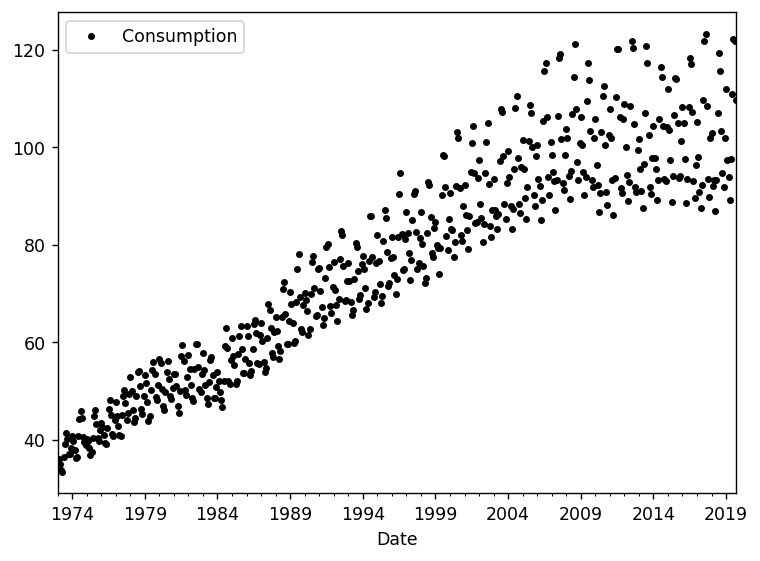

In [11]:
df.plot(style='k.')
plt.show()

In [12]:
# Decomposition of Time Series

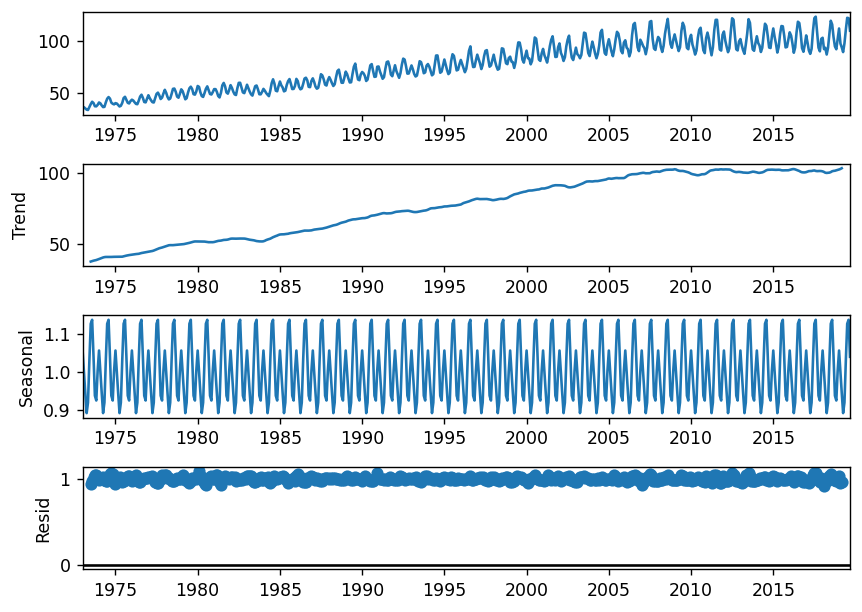

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

## 2. Checking the Stationarity of series and if not then stationarising the time series.

#### Using Augmented Dickey Fuller (statistical test) , we identify the series is stationary or non-stationary, Also using Rolling Statistics(Mean, Standard Variance) we can check it 

In [14]:
from statsmodels.tsa.stattools import adfuller


### Function for adfuller test and rolling mean& standard deviation

In [15]:
def rolling_statistics(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
     

In [16]:
#Single function for performing adfuller test

#Ho: It is non stationary or there is a unit root in an AR model, which implies that the time series is not stationary
#H1: It is stationary

#The more negative ADF statistics is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.
        
def adfuller_test(timeseries):
    result=adfuller(timeseries)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
     
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

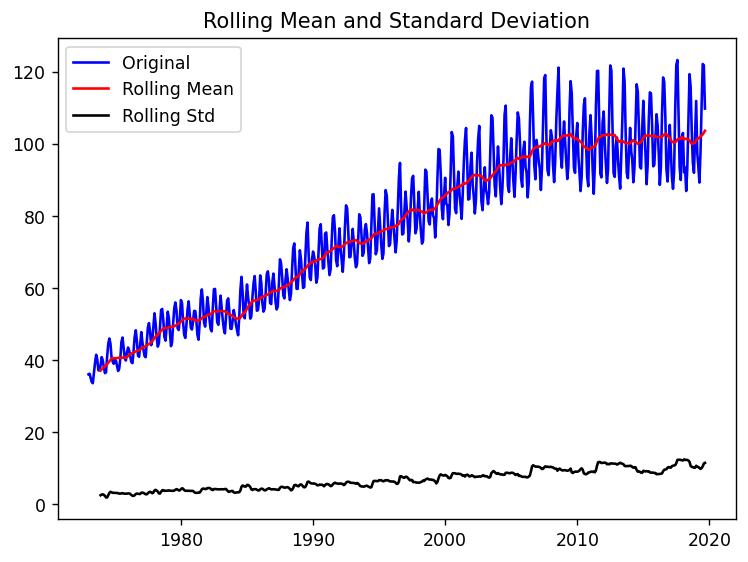

In [17]:
rolling_statistics(df)

In [18]:
adfuller_test(df)

ADF Test Statistic : -1.7405933729832443
p-value : 0.41032816044686793
#Lags Used : 15
Number of Observations Used : 545
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
Critical Values:
	1%: -3.442405720052601
	5%: -2.866857804790472
	10%: -2.5696022094099824


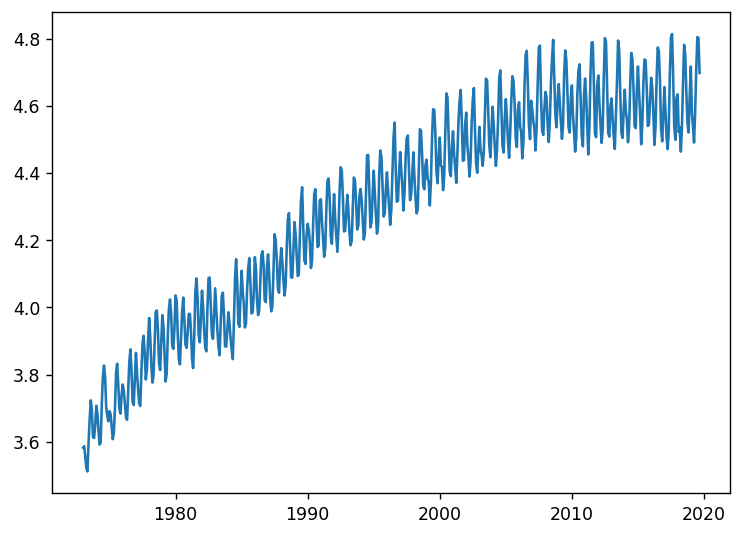

In [19]:

df_log = np.log(df)
plt.plot(df_log)

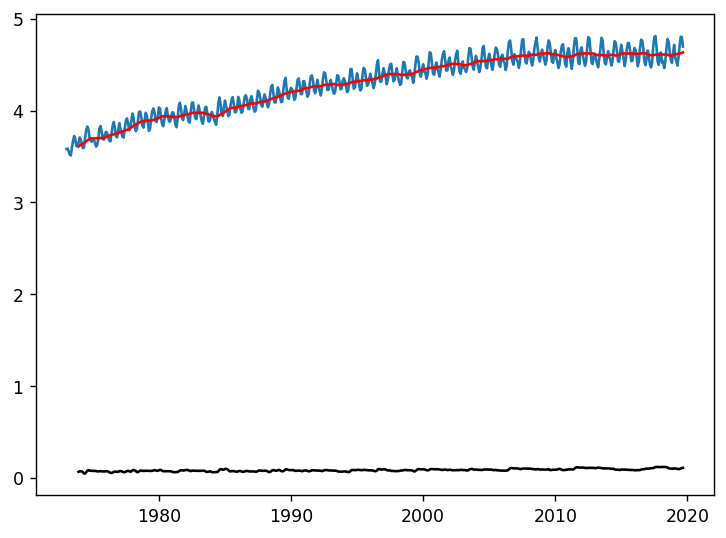

In [20]:
##Rolling statistics ( mean and standard deviation ) of df_log

rolling_mean = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()

plt.plot(df_log)
plt.plot(rolling_mean, color="red")
plt.plot(std_dev, color ="black")

plt.show()

In [21]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  561 non-null    float64
dtypes: float64(1)
memory usage: 8.8 KB


In [22]:
df_log_moving_avg_diff = df_log-rolling_mean
df_log_moving_avg_diff.dropna(inplace=True)

ADF Test Statistic : -6.459932087121441
p-value : 1.4517259827499479e-08
#Lags Used : 14
Number of Observations Used : 535
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
	1%: -3.4426321555520905
	5%: -2.86695748394138
	10%: -2.5696553279762426


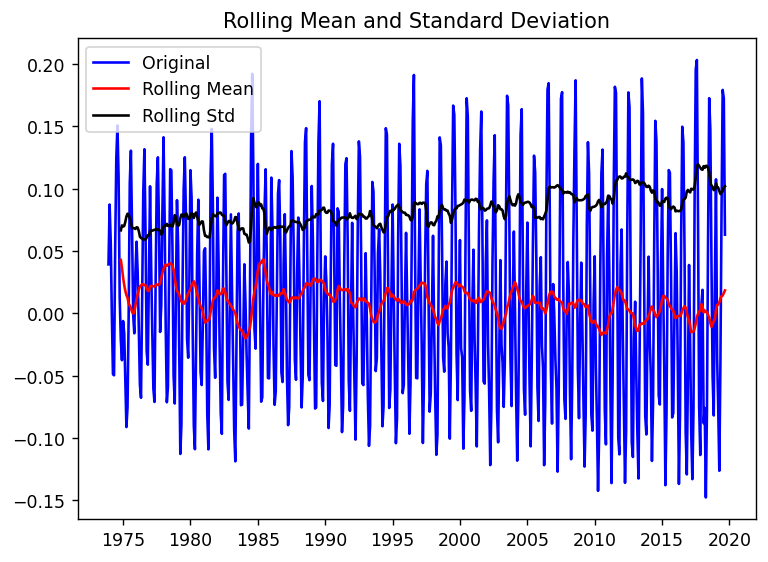

In [23]:
adfuller_test(df_log_moving_avg_diff)
rolling_statistics(df_log_moving_avg_diff)


In [24]:
# Applying exponential decay is another way of transforming a time series such that it is stationary.

### Exponential weighted moving average ( greater weights to recent observations) : 
###### Also to reduce irregularities in the series 

In [25]:

weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

#The half-life is the time lag at which the exponential weights decay by one half.

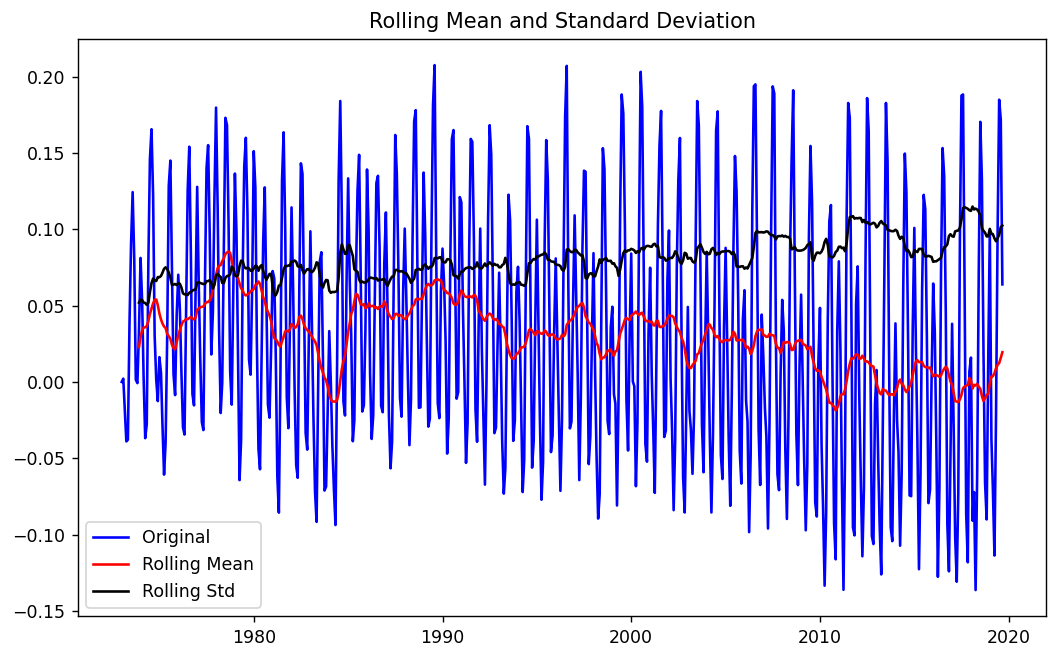

ADF Test Statistic : -3.2369251910434254
p-value : 0.017944355840613782
#Lags Used : 15
Number of Observations Used : 545
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
	1%: -3.442405720052601
	5%: -2.866857804790472
	10%: -2.5696022094099824


In [26]:
df_log_exp_decay = df_log-weighted_average
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
rolling_statistics(df_log_exp_decay)
adfuller_test(df_log_exp_decay)

# Differencing( One method to to remove seasonality ) 

In [27]:
df_log

,Consumption
Date,
1973-01-01,3.582763
1973-02-01,3.587218
1973-03-01,3.557132
1973-04-01,3.521691
1973-05-01,3.511865
...,...
2019-05-01,4.580734
2019-06-01,4.708250
2019-07-01,4.804852


In [28]:
df['consumption First Difference'] = df['Consumption'] - df['Consumption'].shift(1)

# No.of periods to be shift (1)
# index should be in datetime format

In [29]:
df['Seasonal First Difference']=df['Consumption']-df['Consumption'].shift(12)

In [30]:
df.head(14)

,Consumption,consumption First Difference,Seasonal First Difference
Date,,,
1973-01-01,35.9728,NaN,NaN
1973-02-01,36.1334,0.1606,NaN
1973-03-01,35.0625,-1.0709,NaN
1973-04-01,33.8416,-1.2209,NaN
1973-05-01,33.5107,-0.3309,NaN
1973-06-01,36.4823,2.9716,NaN
1973-07-01,39.1412,2.6589,NaN
1973-08-01,41.4137,2.2725,NaN
1973-09-01,40.1639,-1.2498,NaN


In [31]:
df['Seasonal First Difference']

Date
1973-01-01       NaN
1973-02-01       NaN
1973-03-01       NaN
1973-04-01       NaN
1973-05-01       NaN
               ...  
2019-05-01    4.3499
2019-06-01    3.7571
2019-07-01    2.8140
2019-08-01    6.0657
2019-09-01    6.3120
Name: Seasonal First Difference, Length: 561, dtype: float64

In [32]:

adfuller_test(df['Seasonal First Difference'].dropna()) #makesure for dropna, always drop NaN before testing

ADF Test Statistic : -6.283726159436481
p-value : 3.741990175521953e-08
#Lags Used : 12
Number of Observations Used : 536
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
	1%: -3.442609129942274
	5%: -2.866947348175723
	10%: -2.569649926626197


<AxesSubplot: xlabel='Date'>

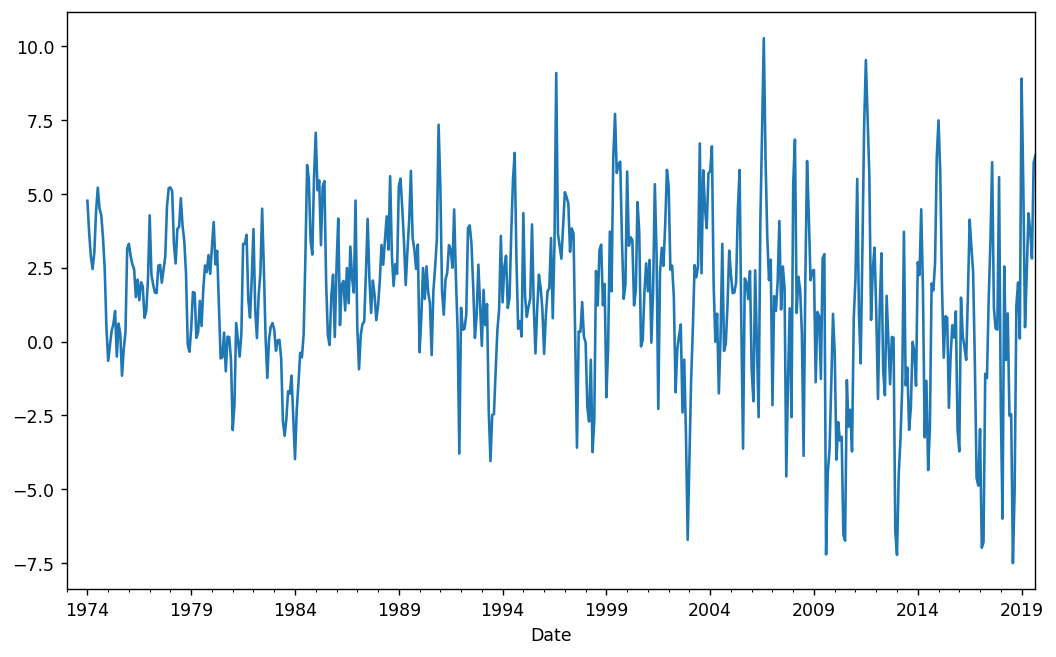

In [33]:
df['Seasonal First Difference'].plot()

In [34]:
df_log

,Consumption
Date,
1973-01-01,3.582763
1973-02-01,3.587218
1973-03-01,3.557132
1973-04-01,3.521691
1973-05-01,3.511865
...,...
2019-05-01,4.580734
2019-06-01,4.708250
2019-07-01,4.804852


In [35]:
#df_log['consumption First Difference'] = df_log['Consumption'] - df_log['Consumption'].shift(1)

In [36]:
#df_log['Seasonal First Difference']=df_log['Consumption']-df_log['Consumption'].shift(12)

In [37]:
#df_log

In [38]:
#adfuller_test(df_log['Seasonal First Difference'].dropna())

In [39]:
#df_log['Seasonal First Difference'].plot()

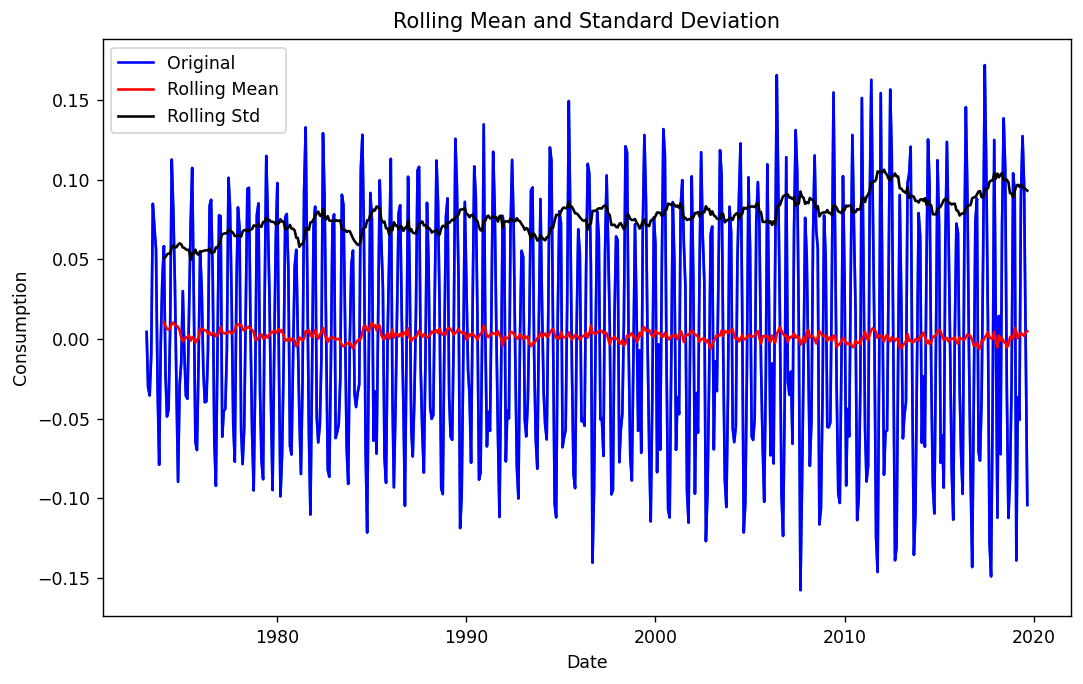

ADF Test Statistic : -6.884809722917913
p-value : 1.4034181751306841e-09
#Lags Used : 14
Number of Observations Used : 545
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
	1%: -3.442405720052601
	5%: -2.866857804790472
	10%: -2.5696022094099824


In [40]:
df_log_diff = df_log - df_log.shift() #by default the period is 1. we can do it by above single syntax also.
df_log_diff.dropna(inplace=True)

plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")

#plt.plot(df_log['consumption First Difference'])
plt.plot(df_log_diff)                                          #Let us test the stationarity of our resultant series

#df_log['consumption First Difference'].dropna(inplace=True)
#rolling_statistics(df_log['consumption First Difference'])
#adfuller_test(df_log['consumption First Difference'].dropna())

rolling_statistics(df_log_diff)
adfuller_test(df_log_diff.dropna())


In [41]:
df_log_diff.head()

,Consumption
Date,
1973-02-01,0.004455
1973-03-01,-0.030085
1973-04-01,-0.035441
1973-05-01,-0.009826
1973-06-01,0.084962


#### Now, our df and df_log both are stationary. we seperatley tested adfuller test on both series df and df_log. 

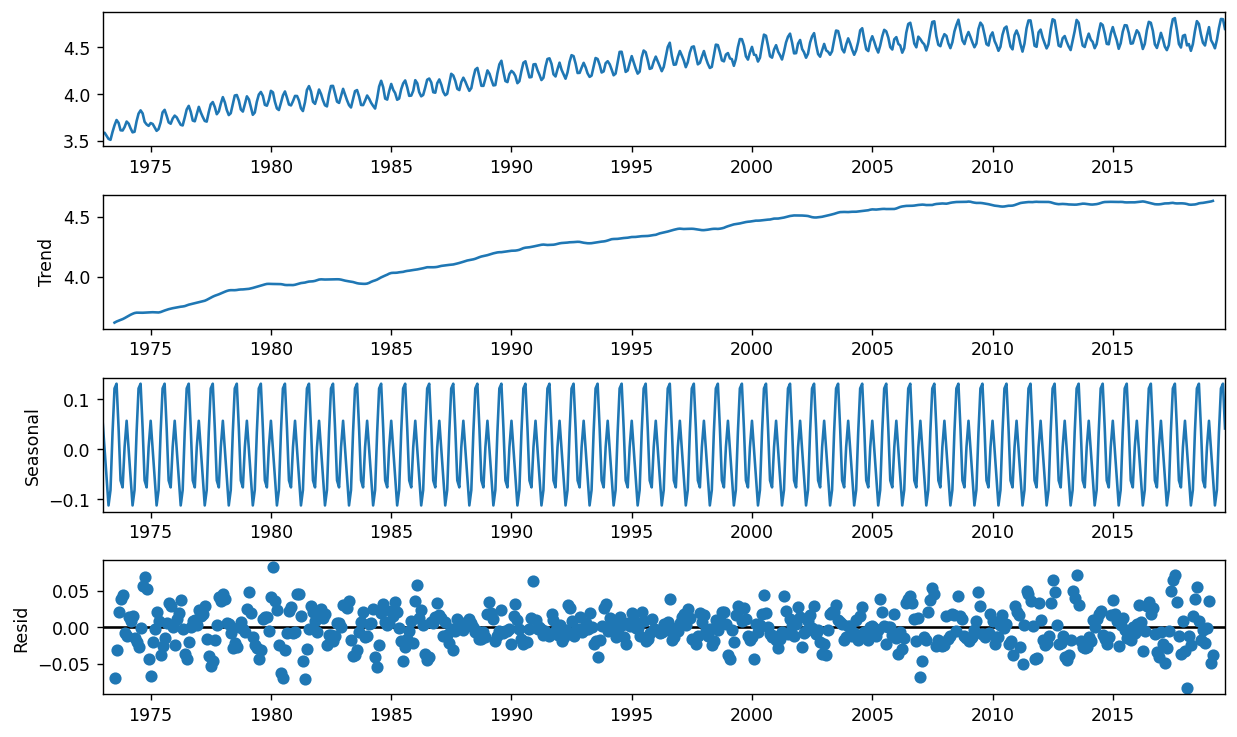

In [42]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df_log is your time series data
result = seasonal_decompose(df_log, model='additive', period=12)  # Use period instead of freq
result.plot()
plt.show()


ADF Test Statistic : -8.862605061719732
p-value : 1.4690466266306198e-14
#Lags Used : 19
Number of Observations Used : 529
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
	1%: -3.442772146350605
	5%: -2.8670191055991836
	10%: -2.5696881663873414


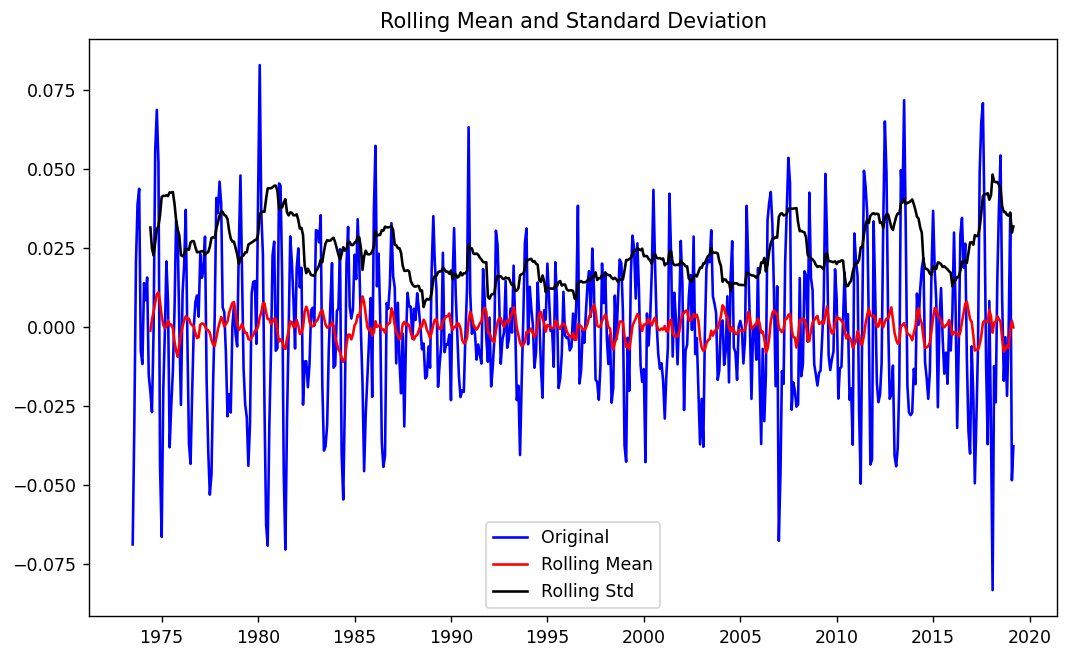

In [43]:
trend = result.trend
trend.dropna(inplace=True)

seasonality = result.seasonal
seasonality.dropna(inplace=True)

residual = result.resid
residual.dropna(inplace=True)

adfuller_test(residual)
rolling_statistics(residual)

plt.show()

## 3. Finding the best parameters for our model

## 3.1 Autoregressive model

## 3.2 Moving Average Model (MA)

## 3.3 Auto Regressive Moving Average (ARMA)

## 3.4 AutoRegressive Integrated Moving Average Model (ARIMA)

### 3.4.1 Autocorrelation Function(ACF)  : MA terms

### 3.4.2 Partial Autocorrelation Function(PACF)  : AR terms

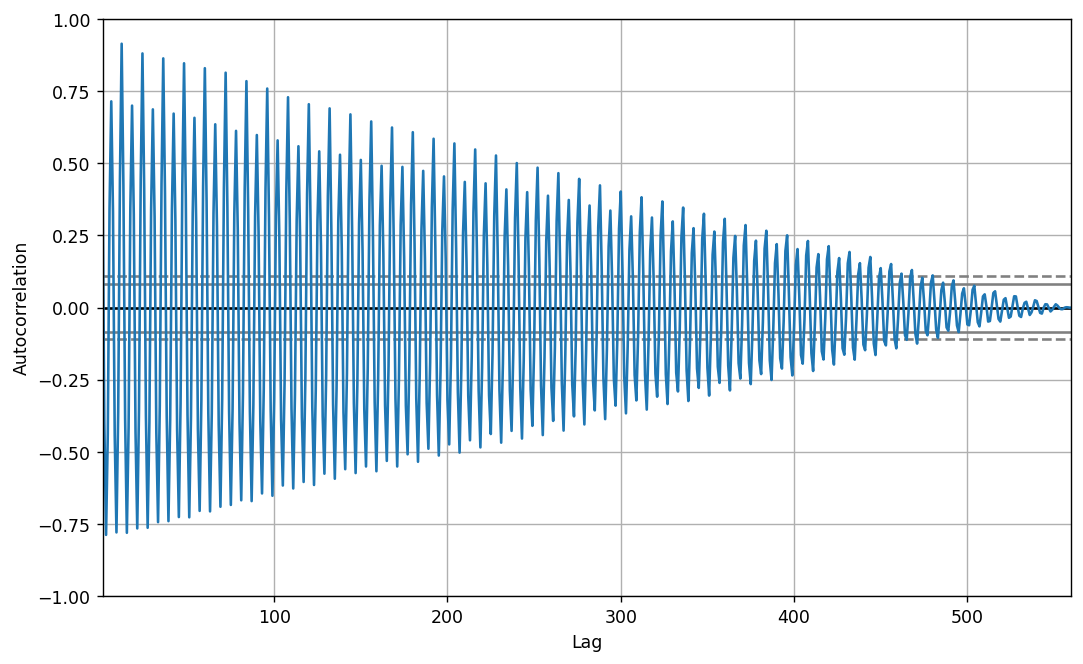

In [44]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_log_diff['Consumption'])  # df_log_diff is a series after df_log - df_log_shift(1), is a stationary
plt.show()                                        #Series

In [45]:
from statsmodels.graphics.tsaplots import plot_acf

Text(0.5, 1.0, 'Auto corelation function')

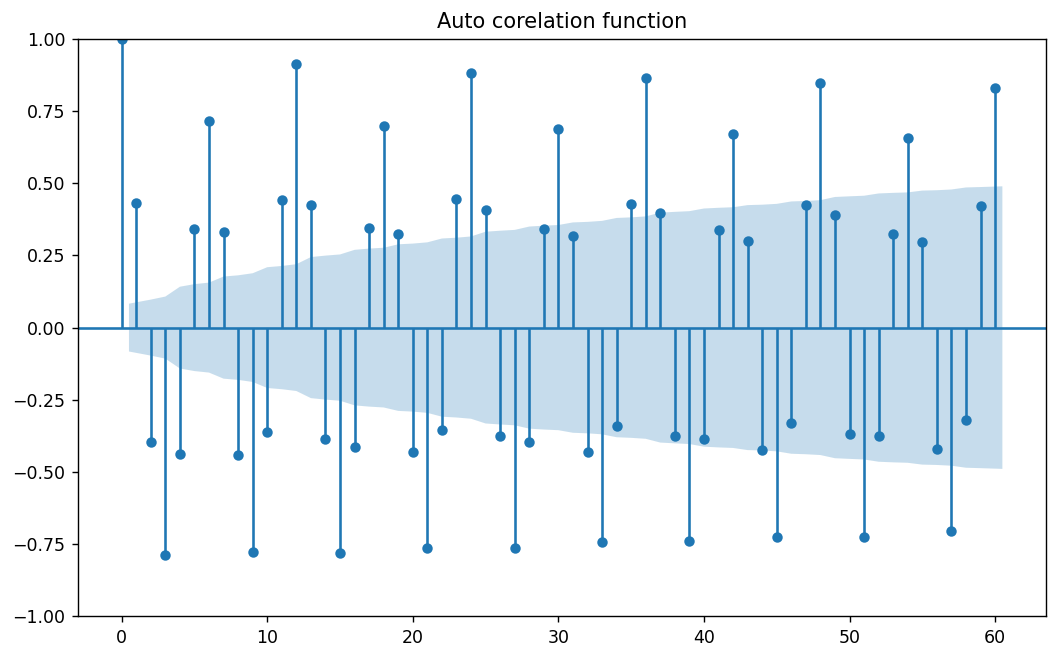

In [46]:
acf=plot_acf(df_log_diff['Consumption'],lags=60)
#plt.subplot(121)
acf
#plt.axhline(y=0,linestyle='-',color='blue')
#plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
#plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corelation function')
#plt.tight_layout()#plot ACF

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf

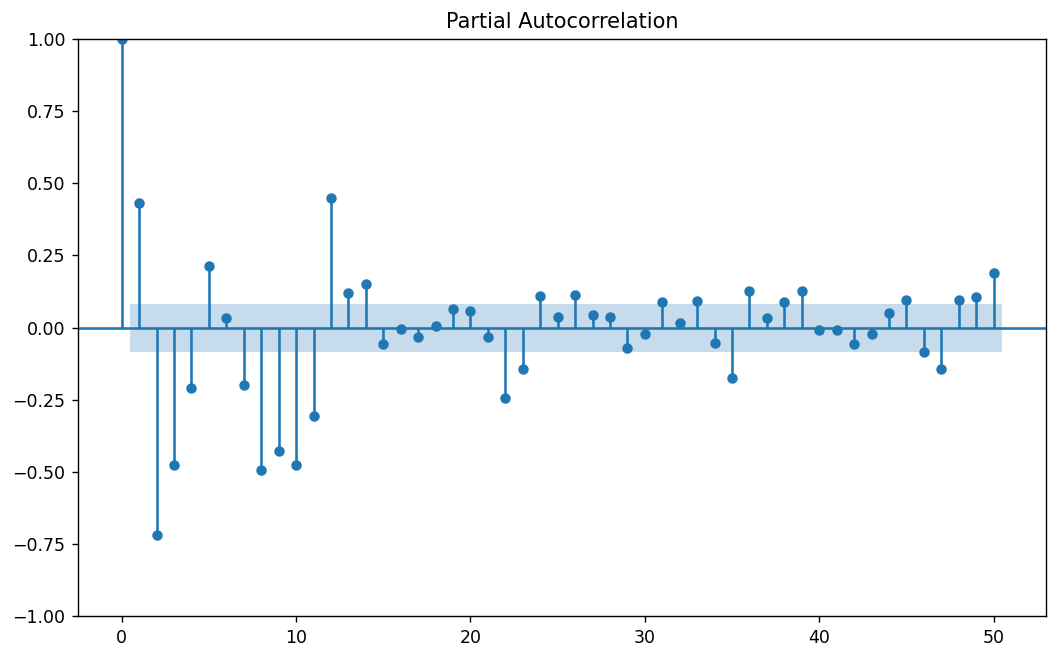

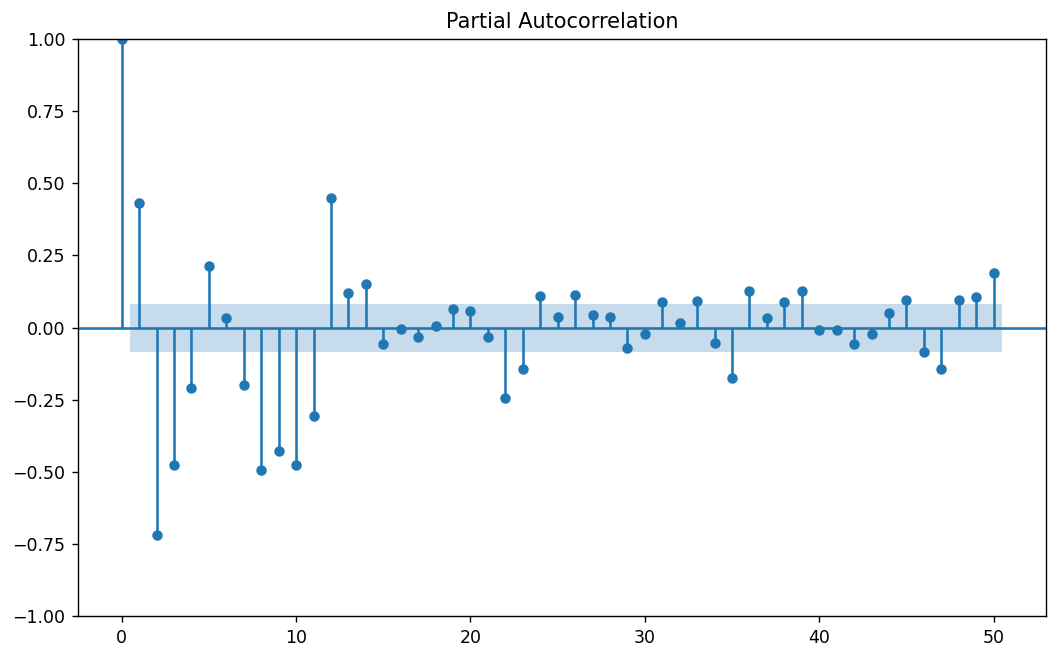

In [48]:
plot_pacf(df_log_diff['Consumption'], lags=50)

## 4. Fitting model


In [49]:
df_log_diff

,Consumption
Date,
1973-02-01,0.004455
1973-03-01,-0.030085
1973-04-01,-0.035441
1973-05-01,-0.009826
1973-06-01,0.084962
...,...
2019-05-01,0.089995
2019-06-01,0.127516
2019-07-01,0.096602


In [50]:
#decomposition = seasonal_decompose(df_log) 

In [51]:
# For non-seasonal data
#p=1, d=1, q=0 or 1      

#p → Number of autoregressive terms,
#d → Number of nonseasonal differences needed for stationarity, and
#q → Number of lagged forecast errors in the prediction equation.

#import statsmodels.api as sm
#import statsmodels.tsa.api as smt
#import statsmodels.formula.api as smf


In [52]:
#from statsmodels.tsa.arima_model import ARIMA
from  statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df_log_diff, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

D:\anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                  560
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 786.471
Date:                Tue, 22 Aug 2023   AIC                          -1564.943
Time:                        15:34:47   BIC                          -1547.631
Sample:                    02-01-1973   HQIC                         -1558.183
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.005      0.402      0.688      -0.007       0.011
ar.L1          0.1438      0.077      1.871      0.061      -0.007       0.294
ma.L1          0.6090      0.052     11.786      0.0

In [53]:
pred = pd.Series(model_fit.predict(dynamic=False))
pred

1973-02-01    0.001895
1973-03-01    0.003250
1973-04-01   -0.020575
1973-05-01   -0.012142
1973-06-01    0.001598
                ...   
2019-05-01   -0.064303
2019-06-01    0.108525
2019-07-01    0.031524
2019-08-01    0.055143
2019-09-01   -0.033963
Freq: MS, Name: predicted_mean, Length: 560, dtype: float64

In [54]:
final_data = pd.concat((df_log_diff,pred),axis = 1)
final_data

,Consumption,predicted_mean
1973-02-01,0.004455,0.001895
1973-03-01,-0.030085,0.003250
1973-04-01,-0.035441,-0.020575
1973-05-01,-0.009826,-0.012142
1973-06-01,0.084962,0.001598
...,...,...
2019-05-01,0.089995,-0.064303
2019-06-01,0.127516,0.108525
2019-07-01,0.096602,0.031524
2019-08-01,-0.002664,0.055143


<AxesSubplot: >

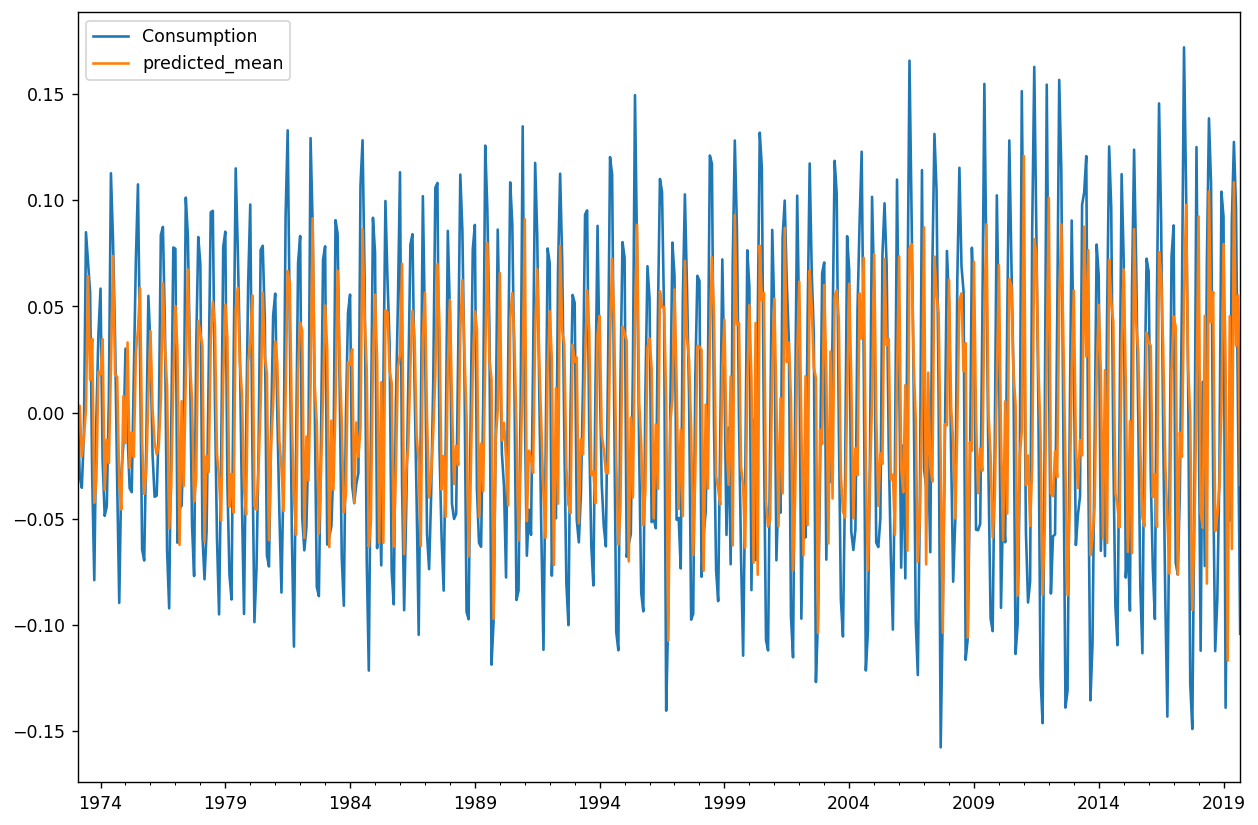

In [55]:
final_data[['Consumption','predicted_mean']].plot(figsize=(12,8))

In [56]:
final_data.tail()

,Consumption,predicted_mean
2019-05-01,0.089995,-0.064303
2019-06-01,0.127516,0.108525
2019-07-01,0.096602,0.031524
2019-08-01,-0.002664,0.055143
2019-09-01,-0.104265,-0.033963


In [57]:
forecasted = model_fit.get_forecast(steps=36, alpha=0.05)

In [58]:
forecasted.predicted_mean

2019-10-01   -0.056182
2019-11-01   -0.006457
2019-12-01    0.000694
2020-01-01    0.001722
2020-02-01    0.001870
2020-03-01    0.001891
2020-04-01    0.001894
2020-05-01    0.001895
2020-06-01    0.001895
2020-07-01    0.001895
2020-08-01    0.001895
2020-09-01    0.001895
2020-10-01    0.001895
2020-11-01    0.001895
2020-12-01    0.001895
2021-01-01    0.001895
2021-02-01    0.001895
2021-03-01    0.001895
2021-04-01    0.001895
2021-05-01    0.001895
2021-06-01    0.001895
2021-07-01    0.001895
2021-08-01    0.001895
2021-09-01    0.001895
2021-10-01    0.001895
2021-11-01    0.001895
2021-12-01    0.001895
2022-01-01    0.001895
2022-02-01    0.001895
2022-03-01    0.001895
2022-04-01    0.001895
2022-05-01    0.001895
2022-06-01    0.001895
2022-07-01    0.001895
2022-08-01    0.001895
2022-09-01    0.001895
Freq: MS, Name: predicted_mean, dtype: float64

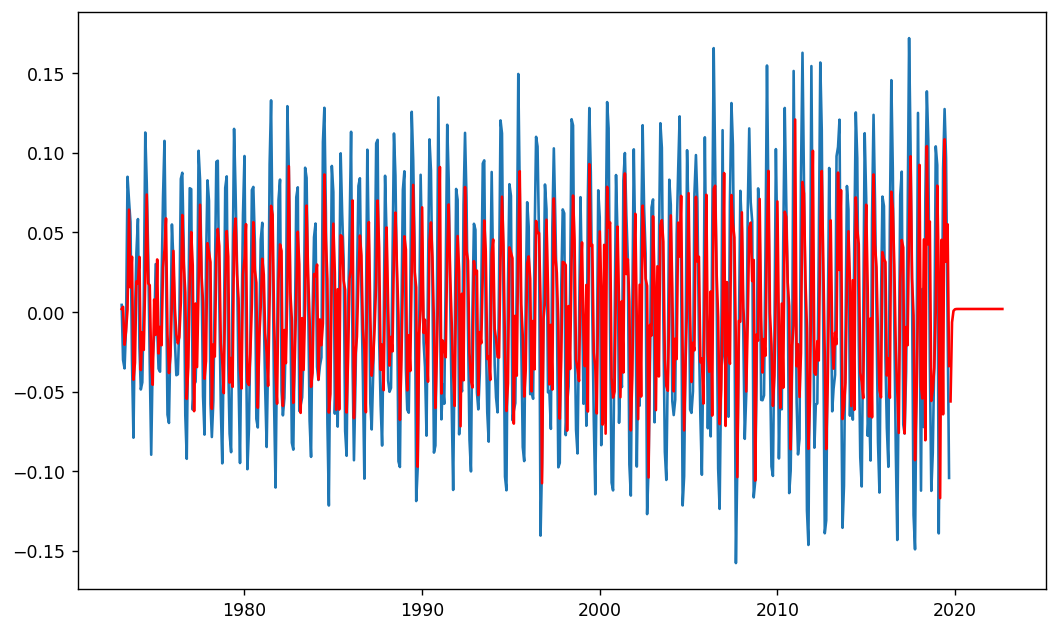

In [59]:
plt.plot(df_log_diff)
plt.plot(model_fit.predict(dynamic=False), color= 'red')
plt.plot(forecasted.predicted_mean, color ='red')

In [60]:
#df_log_diff['forecast']=results.predict(start=300,end=400,dynamic=True)
#pred_dynamic = results.predict(start=pd.to_datetime('1973-01-01'), dynamic=True)
#df_log_diff[['Consumption','forecast']].plot(figsize=(12,8))

In [61]:
#df_log.drop("forecast", axis= 1, inplace= True)

# SARIMAX MODEL

In [62]:
import statsmodels.api as sm

In [63]:
model_sarimax=sm.tsa.statespace.SARIMAX(df_log_diff['Consumption'],order=(1, 0, 1),seasonal_order=(1,0,1,12))
model_fit_sarimax=model_sarimax.fit()
print(model_fit_sarimax.summary())

D:\anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        Consumption   No. Observations:                  560
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                1353.043
Date:                            Tue, 22 Aug 2023   AIC                          -2696.087
Time:                                    15:34:54   BIC                          -2674.447
Sample:                                02-01-1973   HQIC                         -2687.637
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6333      0.048     13.133      0.000       0.539       0.728
ma.L1         -0.9034      0.028   

D:\anakonda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
pred_sarimax = pd.Series(model_fit_sarimax.predict(dynamic=False))
pred_sarimax

1973-02-01    0.000000
1973-03-01   -0.000778
1973-04-01    0.005375
1973-05-01    0.012407
1973-06-01    0.013258
                ...   
2019-05-01    0.057158
2019-06-01    0.128947
2019-07-01    0.089347
2019-08-01   -0.014680
2019-09-01   -0.115505
Freq: MS, Name: predicted_mean, Length: 560, dtype: float64

In [65]:
final_data_sarimax = pd.concat((df_log_diff,pred_sarimax),axis = 1)
final_data_sarimax

,Consumption,predicted_mean
1973-02-01,0.004455,0.000000
1973-03-01,-0.030085,-0.000778
1973-04-01,-0.035441,0.005375
1973-05-01,-0.009826,0.012407
1973-06-01,0.084962,0.013258
...,...,...
2019-05-01,0.089995,0.057158
2019-06-01,0.127516,0.128947
2019-07-01,0.096602,0.089347
2019-08-01,-0.002664,-0.014680


<AxesSubplot: >

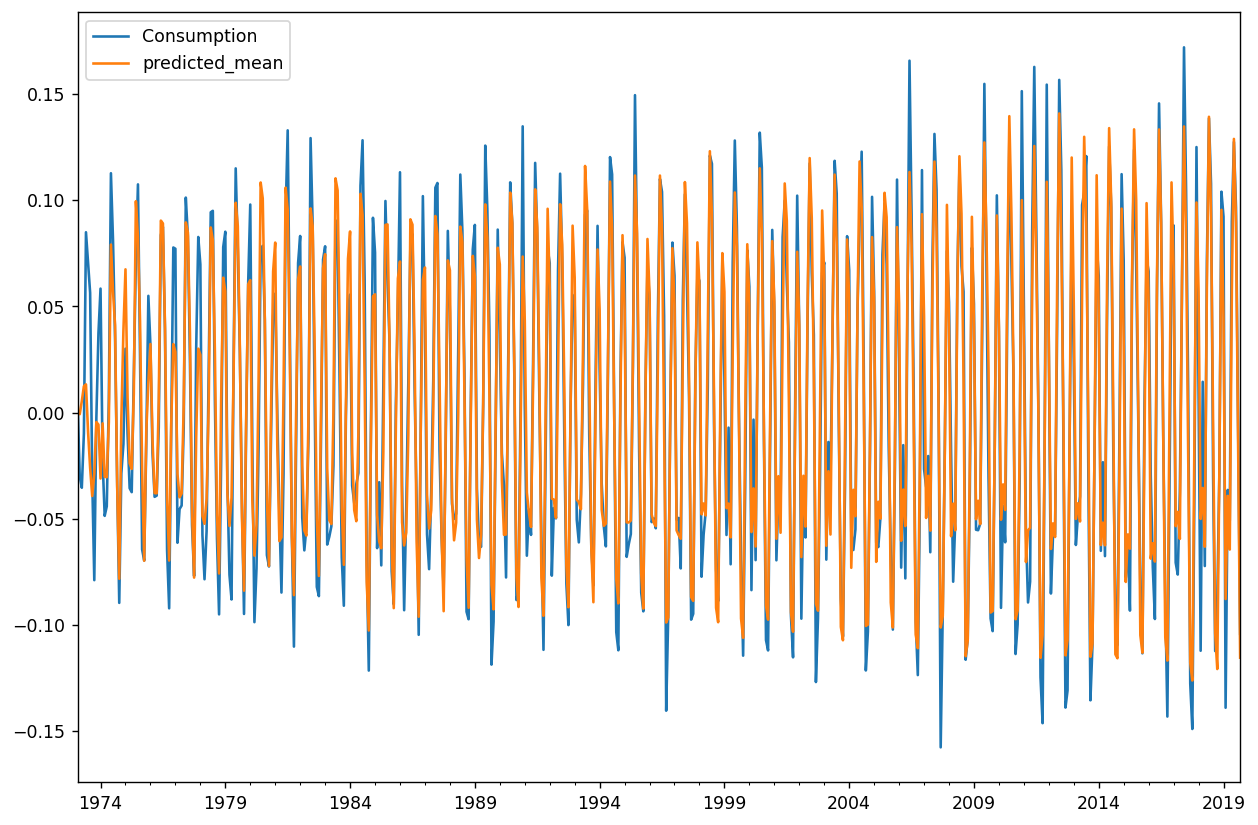

In [66]:
final_data_sarimax[['Consumption','predicted_mean']].plot(figsize=(12,8))

In [67]:
final_data_sarimax.tail()

,Consumption,predicted_mean
2019-05-01,0.089995,0.057158
2019-06-01,0.127516,0.128947
2019-07-01,0.096602,0.089347
2019-08-01,-0.002664,-0.014680
2019-09-01,-0.104265,-0.115505


In [68]:
forecasted_sarimax = model_fit_sarimax.get_forecast(steps=36, alpha=0.05)

In [69]:
forecasted_sarimax.predicted_mean

2019-10-01   -0.124525
2019-11-01   -0.027923
2019-12-01    0.096676
2020-01-01    0.056205
2020-02-01   -0.087758
2020-03-01   -0.042375
2020-04-01   -0.063256
2020-05-01    0.065898
2020-06-01    0.136366
2020-07-01    0.095499
2020-08-01   -0.007481
2020-09-01   -0.107382
2020-10-01   -0.118441
2020-11-01   -0.024186
2020-12-01    0.098782
2021-01-01    0.057550
2021-02-01   -0.086625
2021-03-01   -0.041688
2021-04-01   -0.062738
2021-05-01    0.065985
2021-06-01    0.136206
2021-07-01    0.095376
2021-08-01   -0.007404
2021-09-01   -0.107100
2021-10-01   -0.118148
2021-11-01   -0.024116
2021-12-01    0.098567
2022-01-01    0.057426
2022-02-01   -0.086424
2022-03-01   -0.041591
2022-04-01   -0.062594
2022-05-01    0.065836
2022-06-01    0.135896
2022-07-01    0.095160
2022-08-01   -0.007387
2022-09-01   -0.106856
Freq: MS, Name: predicted_mean, dtype: float64

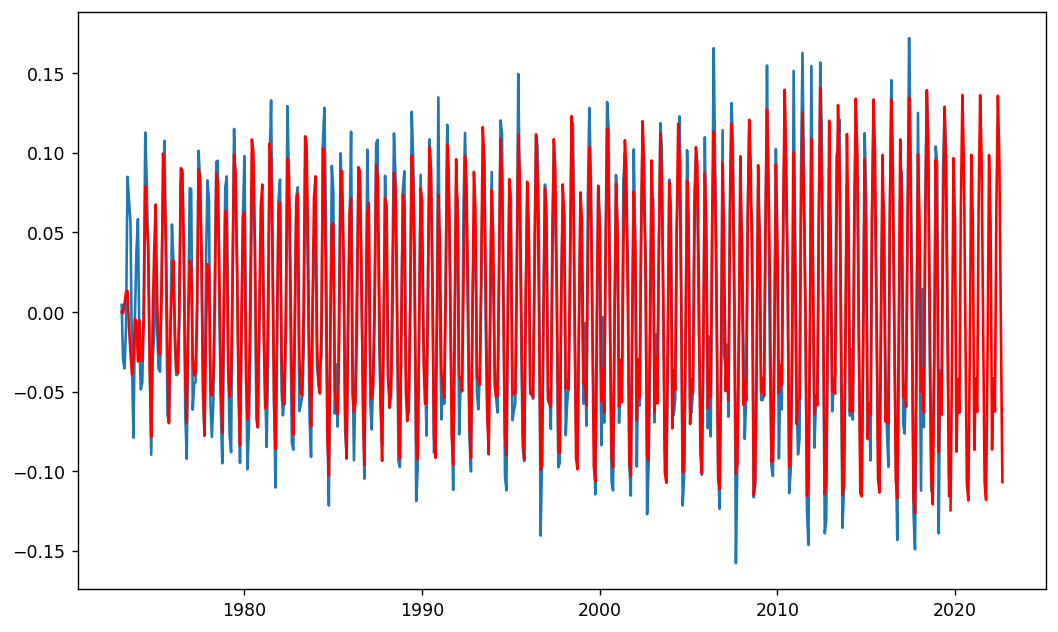

In [70]:
plt.plot(df_log_diff)
plt.plot(model_fit_sarimax.predict(dynamic=False), color ='red')
plt.plot(forecasted_sarimax.predicted_mean, color ='red')

In [71]:
## from both model forecast done till 01-09-2022,now we will plot the data and see the accuracy metrices. 

In [72]:
final_data_sarimax

,Consumption,predicted_mean
1973-02-01,0.004455,0.000000
1973-03-01,-0.030085,-0.000778
1973-04-01,-0.035441,0.005375
1973-05-01,-0.009826,0.012407
1973-06-01,0.084962,0.013258
...,...,...
2019-05-01,0.089995,0.057158
2019-06-01,0.127516,0.128947
2019-07-01,0.096602,0.089347
2019-08-01,-0.002664,-0.014680


## Accuracy metrics

In [73]:
def forecast_accuracy(ac, fo):
    mape =np.mean(np.abs(final_data.Consumption-final_data.predicted_mean)/np.abs(final_data.Consumption)) #MAPE
    mean =np.mean(final_data.Consumption-final_data.predicted_mean) #MEAN
    mae = np.mean(np.abs(final_data.Consumption-final_data.predicted_mean))   #MAE
    mpe= np.mean(final_data.Consumption-final_data.predicted_mean)/final_data.Consumption# MPE
    rmse = np.mean((final_data.Consumption-final_data.predicted_mean)**2)**.5 #RMSE
    corr = np.corrcoef(final_data.Consumption-final_data.predicted_mean)[0,1]  #corr

    return({'MAPE' : mape, 'MEAN' : mean, 'MAE' :mae , 'MPE':mpe, 'RMSE' : rmse, 'CORR':corr})


In [74]:
mape= np.mean(np.abs(final_data.Consumption-final_data.predicted_mean)/np.abs(final_data.Consumption)) #MAPE

mape2= np.mean(np.abs(final_data_sarimax.Consumption-final_data_sarimax.predicted_mean)/np.abs(final_data_sarimax.Consumption)) #MAPE

In [75]:
print('value of mape is',mape)
print('value of mape2 is',mape2)

value of mape is 1.736592915838509
value of mape2 is 0.605375200421485


In [76]:
mean =np.mean(final_data.Consumption-final_data.predicted_mean) #MEAN mae = np.mean(np.abs(final_data.Consumption-final_data.predicted_mean))   #MAE

mean2 =np.mean(final_data_sarimax.Consumption-final_data_sarimax.predicted_mean) #MEAN mae = np.mean(np.abs(final_data.Consumption-final_data.predicted_mean))   #MAE


In [77]:
print('value of mean is',mean)
print('value of mean2 is',mean2)

value of mean is -1.5202479829713536e-05
value of mean2 is -0.0012111962183940954


In [78]:
mpe= np.mean(final_data.Consumption-final_data.predicted_mean)/final_data.Consumption# MPE
mpe2= np.mean(final_data_sarimax.Consumption-final_data_sarimax.predicted_mean)/final_data_sarimax.Consumption# MPE

In [79]:
print('value of mpe is',mpe)
print('value of mpe2 is',mpe2)

value of mpe is 1973-02-01   -0.003413
1973-03-01    0.000505
1973-04-01    0.000429
1973-05-01    0.001547
1973-06-01   -0.000179
                ...   
2019-05-01   -0.000169
2019-06-01   -0.000119
2019-07-01   -0.000157
2019-08-01    0.005706
2019-09-01    0.000146
Name: Consumption, Length: 560, dtype: float64
value of mpe2 is 1973-02-01   -0.271901
1973-03-01    0.040259
1973-04-01    0.034175
1973-05-01    0.123264
1973-06-01   -0.014256
                ...   
2019-05-01   -0.013458
2019-06-01   -0.009498
2019-07-01   -0.012538
2019-08-01    0.454577
2019-09-01    0.011617
Name: Consumption, Length: 560, dtype: float64


In [80]:

rmse = np.mean((final_data.Consumption-final_data.predicted_mean)**2)**.5 #RMSE

rmse2 = np.mean((final_data_sarimax.Consumption-final_data_sarimax.predicted_mean)**2)**.5 #RMSE

In [81]:
print('value of rmse is',rmse)
print('value of rmse2 is',rmse2)

value of rmse is 0.05937472154098484
value of rmse2 is 0.02231488997621612


From above RMSE and MAPE metices we can say the SARIMAX model works well with lower error. So, we selected SARIMAX instead of ARIMA model. 

## ........................................END........................